In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# AR - Autoregressive  Model
# ARIMA - Autoregressive Integrated Moving Average Model ( integration - application one or more times to eliminate trend or non-stationarity of the mean function )
# MA - Moving Average Model
# ARMA - Autoregressive Moving Average Model
# SARIMA - Seasonal Autoregressive Integrated Moving Average Model
# CNN - Convolutional neural networks for classification and regression analysis of one-dimensional spectral data. 
# LSTM -  Long Short-Term Memory, a model initially proposed in 1997.
# ResNet - Optimal deep residual regression model is built for nonliear regression. 
# VARMAX - The VARMAX class in statsmodels allows estimation of VAR, VMA, and VARMA models (through the order argument), optionally with a constant term (via the trend argument).


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [5]:
df = pd.read_csv("BAER.SW.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-16,52.799999,52.900002,52.099998,52.400002,42.967743,747145
1,2017-05-17,52.150002,52.200001,50.750000,50.750000,41.614750,857545
2,2017-05-18,50.599998,51.099998,50.049999,50.799999,41.655743,867912
3,2017-05-19,51.049999,51.700001,50.849998,51.700001,42.393742,808367
4,2017-05-22,51.750000,52.299999,51.049999,52.250000,42.844734,803134


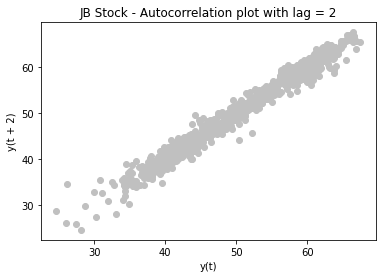

In [7]:
# A lag plot checks whether a data set or time series is random or not. 
# Random data should not exhibit any identifiable structure in the lag plot. 
plt.figure()
lag_plot(df['Open'],lag=2 ,CMAP ='Greys', c='silver')
plt.title('JB Stock - Autocorrelation plot with lag = 2')
plt.show()

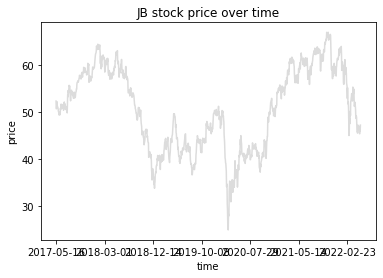

In [9]:
plt.plot(df["Date"], df["Close"], color='gainsboro')
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])# Set label locations /0 start, 1259 maximum, 200 steps/
plt.title("JB stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [10]:
# divide the data into a training (70 % ) and test (30%) set
# MSE 0.997 of the test set is large, this is the average squared value across all the test set predictions. 
# There is no correct value for MSE, the lower the value the better and 0 means the model is perfect.

train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

# we can select ARIMA parameters: p=4, d=1 and q=0
# p - number of lag observations
# d - degree of differencing
# q - size/width of the moving average window

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.9973282862333076


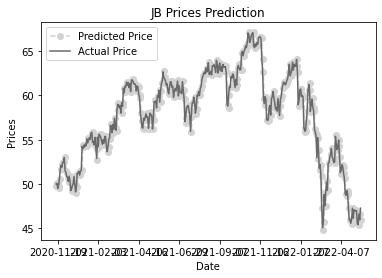

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='lightgrey', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='dimgrey', label='Actual Price')
plt.title('JB Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

In [ ]:
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/



